Importando bibliotecas

In [7]:
import time
import matplotlib.pyplot as plt
import pandas as pd

Função Torre de Hanói com contador de chamadas

In [8]:
def hanoi(n, origem, destino, auxiliar, contador):
    contador[0] += 1
    if n == 1:
        return
    hanoi(n-1, origem, auxiliar, destino, contador)
    hanoi(1, origem, destino, auxiliar, contador)
    hanoi(n-1, auxiliar, destino, origem, contador)

Experimento

In [ ]:
valores_n = [5, 10, 15, 20, 25, 30] 
tempos = []
chamadas = []
teorico = []

for n in valores_n:
    contador = [0]
    inicio = time.time()
    hanoi(n, "A", "C", "B", contador)
    fim = time.time()
    tempos.append(fim - inicio)
    chamadas.append(contador[0])
    teorico.append(2**n - 1)

Criando DataFrame com os resultados

In [16]:
df = pd.DataFrame({
    "n": valores_n,
    "Tempo (s)": tempos,
    "Chamadas (experimental)": chamadas,
    "Chamadas (teórico 2^n - 1)": teorico
})

Plotando gráfico 1: Tempo de execução

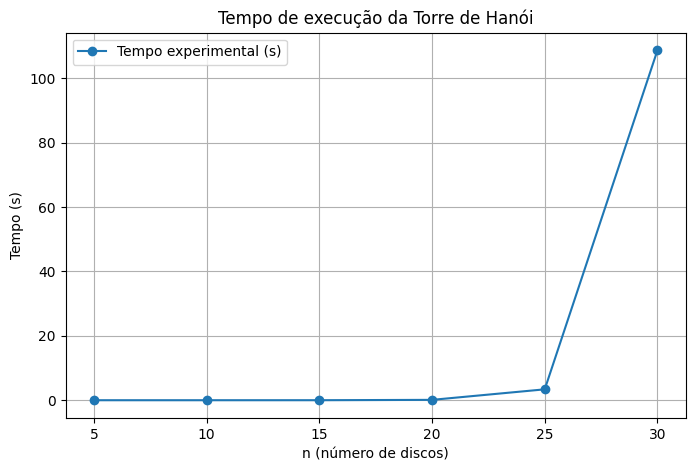

In [17]:
plt.figure(figsize=(8,5))
plt.plot(valores_n, tempos, marker='o', label="Tempo experimental (s)")
plt.xlabel("n (número de discos)")
plt.ylabel("Tempo (s)")
plt.title("Tempo de execução da Torre de Hanói")
plt.legend()
plt.grid(True)
plt.show()

Plotando gráfico 2: Chamadas (experimental vs teórico)

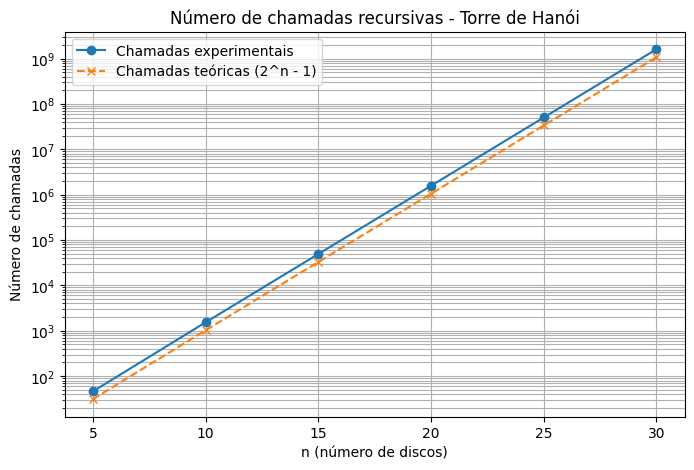

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(valores_n, chamadas, marker='o', label="Chamadas experimentais")
plt.plot(valores_n, teorico, marker='x', linestyle="--", label="Chamadas teóricas (2^n - 1)")
plt.xlabel("n (número de discos)")
plt.ylabel("Número de chamadas")
plt.title("Número de chamadas recursivas - Torre de Hanói")
plt.yscale("log")  # escala log para visualizar crescimento exponencial
plt.legend()
plt.grid(True, which="both")
plt.show()